In [14]:
%load_ext autoreload
%autoreload complete

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="protest-impact")

In [16]:
from protest_impact.data import german_regions

coordinates = {
    a["name"]: geolocator.geocode(a["capital"] + ", Germany") for a in german_regions
}
coordinates

{'Baden-Württemberg': Location(Stuttgart, Baden-Württemberg, Deutschland, (48.7784485, 9.1800132, 0.0)),
 'Bayern': Location(München, Bayern, Deutschland, (48.1371079, 11.5753822, 0.0)),
 'Berlin': Location(Berlin, Deutschland, (52.5170365, 13.3888599, 0.0)),
 'Brandenburg': Location(Potsdam, Brandenburg, Deutschland, (52.4009309, 13.0591397, 0.0)),
 'Bremen': Location(Bremen, Deutschland, (53.0758196, 8.8071646, 0.0)),
 'Hamburg': Location(Hamburg, Deutschland, (53.550341, 10.000654, 0.0)),
 'Hessen': Location(Wiesbaden, Hessen, Deutschland, (50.0820384, 8.2416556, 0.0)),
 'Mecklenburg-Vorpommern': Location(Schwerin, Mecklenburg-Vorpommern, Deutschland, (53.6288297, 11.4148038, 0.0)),
 'Niedersachsen': Location(Hannover, Region Hannover, Niedersachsen, Deutschland, (52.3744779, 9.7385532, 0.0)),
 'Nordrhein-Westfalen': Location(Düsseldorf, Rhein-Kreis Neuss, Nordrhein-Westfalen, Deutschland, (51.2254018, 6.7763137, 0.0)),
 'Rheinland-Pfalz': Location(Mainz, Rheinland-Pfalz, Deutschlan

In [17]:
from meteostat import Point

coordinates = {k: Point(v.latitude, v.longitude) for k, v in coordinates.items()}
coordinates

{'Baden-Württemberg': <meteostat.interface.point.Point at 0x12d8e1cc0>,
 'Bayern': <meteostat.interface.point.Point at 0x10c171780>,
 'Berlin': <meteostat.interface.point.Point at 0x2a99f6680>,
 'Brandenburg': <meteostat.interface.point.Point at 0x2a99f6b60>,
 'Bremen': <meteostat.interface.point.Point at 0x2a99f7790>,
 'Hamburg': <meteostat.interface.point.Point at 0x2aafc7d30>,
 'Hessen': <meteostat.interface.point.Point at 0x2aafc7880>,
 'Mecklenburg-Vorpommern': <meteostat.interface.point.Point at 0x2aafc75b0>,
 'Niedersachsen': <meteostat.interface.point.Point at 0x2aafc7dc0>,
 'Nordrhein-Westfalen': <meteostat.interface.point.Point at 0x2aafc7640>,
 'Rheinland-Pfalz': <meteostat.interface.point.Point at 0x2aafc54b0>,
 'Saarland': <meteostat.interface.point.Point at 0x2aafc6dd0>,
 'Sachsen': <meteostat.interface.point.Point at 0x2aafc76d0>,
 'Sachsen-Anhalt': <meteostat.interface.point.Point at 0x2aafc7940>,
 'Schleswig-Holstein': <meteostat.interface.point.Point at 0x2aafc7be0>,


In [18]:
from datetime import datetime

from meteostat import Daily

df = Daily(
    coordinates["Berlin"], start=datetime(2019, 1, 1), end=datetime(2020, 1, 1)
).fetch()
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2019-01-01,6.6,3.2,8.7,1.2,0.0,275.0,28.8,67.7,1017.1,42.0
2019-01-02,1.8,-1.8,3.7,0.2,0.0,325.0,27.0,63.7,1023.9,108.0
2019-01-03,-0.3,-2.9,2.0,0.1,0.0,315.0,16.9,37.1,1032.9,0.0
2019-01-04,2.1,-0.5,5.1,1.9,0.0,284.0,16.6,36.7,1027.6,0.0
2019-01-05,6.1,2.1,8.1,0.0,0.0,326.0,19.4,38.9,1020.0,24.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-28,1.3,-1.4,2.4,0.0,0.0,339.0,11.5,23.4,1041.9,0.0
2019-12-29,0.0,-3.6,2.3,0.0,0.0,198.0,6.8,22.3,1039.4,264.0
2019-12-30,4.5,1.6,7.2,0.0,0.0,211.0,12.6,28.4,1028.6,12.0


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

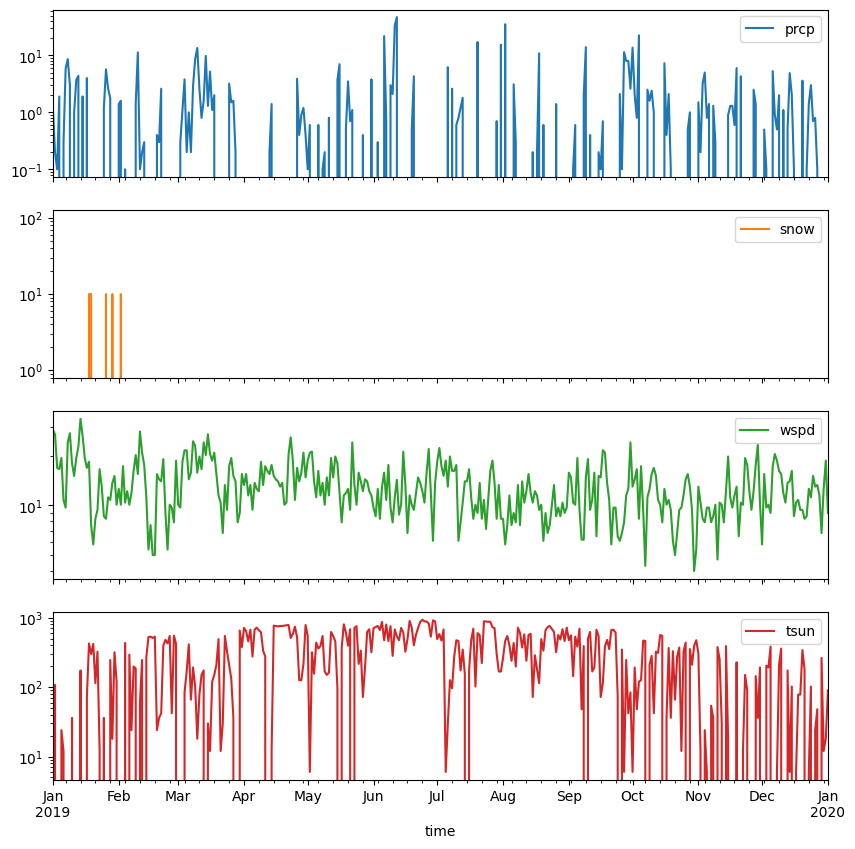

In [19]:
df.plot(y=["prcp", "snow", "wspd", "tsun"], subplots=True, figsize=(10, 10), logy=True)

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

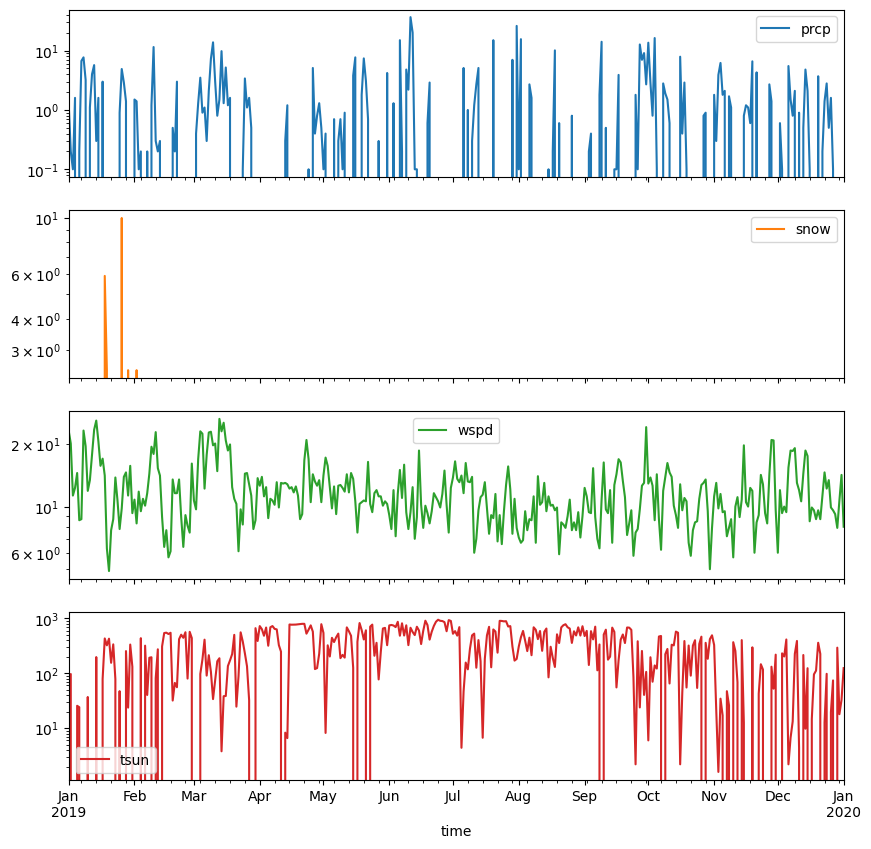

In [20]:
coordinates["Berlin"].method = "weighted"
df = Daily(
    coordinates["Berlin"], start=datetime(2019, 1, 1), end=datetime(2020, 1, 1)
).fetch()
df.plot(y=["prcp", "snow", "wspd", "tsun"], subplots=True, figsize=(10, 10), logy=True)

In [40]:
from protest_impact.data.protests import aggregate_protests, load_acled

protests = load_acled()
len(protests)

13235

In [41]:
protests.head(10)

,event_date,sub_event_type,assoc_actor_1,admin1,location,notes,weekday,region_code,size
1887,2022-12-31,Peaceful protest,Women (Germany),Baden-Württemberg,Freiburg im Breisgau,"On 31 December 2022, a group of individuals de...",Saturday,BW,NaN
1888,2022-12-31,Peaceful protest,NaN,Berlin,Berlin - Mitte,"On 31 December 2022, around 300 individuals jo...",Saturday,BE,300.0
1889,2022-12-31,Peaceful protest,NaN,Bremen,Bremen,"On 31 December 2022, around 30 individuals joi...",Saturday,HB,30.0
1890,2022-12-31,Peaceful protest,NaN,Bayern,Munchen,"On 31 December 2022, a group of individuals pr...",Saturday,BY,NaN
1891,2022-12-31,Peaceful protest,NaN,Hamburg,Hamburg - Hamburg-Mitte,"On 31 December 2022, a group of about 30 indiv...",Saturday,HH,30.0
1892,2022-12-31,Peaceful protest,NaN,Niedersachsen,Lingen,"On 31 December 2022, a group of individuals de...",Saturday,NI,NaN
1893,2022-12-28,Peaceful protest,Labor Group (Germany),Rheinland-Pfalz,Speyer,"On 28 December 2022, an estimated 60 members o...",Wednesday,RP,60.0
1894,2022-12-28,Peaceful protest,NaN,Nordrhein-Westfalen,Dortmund,"On 28 December 2022, people protested in Dortm...",Wednesday,NW,NaN
1895,2022-12-28,Peaceful protest,NaN,Baden-Württemberg,Offenburg,"On 28 December 2022, a group of individuals de...",Wednesday,BW,NaN
1896,2022-12-26,Peaceful protest,Labor Group (Germany),Nordrhein-Westfalen,Solingen,"On 26 December 2022, between 100 and 200 indiv...",Monday,NW,150.0


In [42]:
protests = protests[(~protests["assoc_actor_1"].isna()) & (~protests["size"].isna())]
len(protests)

4541

In [43]:
protests = protests[
    ~protests["location"].isin(["Garmisch-Partenkirchen", "Stolberg (Rhineland)"])
]

In [44]:
org_counts = protests["assoc_actor_1"].value_counts()
print(sum(org_counts))
print(sum(org_counts[org_counts > 20]))
common_orgs = org_counts[org_counts > 20].index

4534
2680


In [45]:
loc_counts = protests["location"].value_counts()
print(sum(loc_counts), len(loc_counts))
print(sum(loc_counts[loc_counts > 20]), len(loc_counts[loc_counts > 20]))
common_locs = loc_counts[loc_counts > 20].index

4534 788
2472 41


In [46]:
protests_ = protests[
    protests["assoc_actor_1"].isin(common_orgs) & protests["location"].isin(common_locs)
]
len(protests_)

1462

In [47]:
protests = protests_

In [48]:
from protest_impact.data.weather import get_weather

# weather_vars = tavg	tmin	tmax	prcp	snow	wdir	wspd	wpgt	pres	tsun
weather_vars = [
    "tavg",
    "tmin",
    "tmax",
    "prcp",
    "snow",
    "wdir",
    "wspd",
    # "wpgt",
    "pres",
    # "tsun",
]

for col in weather_vars:
    protests[col] = protests.apply(
        lambda x: get_weather(x["location"], x["event_date"])[col], axis=1
    )

In [49]:
import numpy as np
import pandas as pd

x_transforms = [lambda x: x, lambda x: np.log(x + 1)]
y_transforms = [
    lambda x: x,
    lambda x: np.log(x + 1),
    # lambda x: np.log(np.log(x + 1) + 1),
]

data = []
for i, x_transform in enumerate(x_transforms):
    for j, y_transform in enumerate(y_transforms):
        x = protests[weather_vars].applymap(x_transform)
        y = protests["size"].apply(y_transform)
        c = x.corrwith(y)
        data.append(dict(tx=i, ty=j, **c))

pd.DataFrame(data)

,tx,ty,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,0,0,0.085350,0.087090,0.079564,-0.019740,-0.019682,0.028662,0.027844,-0.062519
1,0,1,0.090821,0.103708,0.079759,-0.018222,-0.086086,-0.007294,0.033315,-0.068915
2,1,0,0.089061,NaN,NaN,-0.024856,-0.025445,0.036018,0.028228,-0.062436
3,1,1,0.096631,NaN,NaN,-0.006547,-0.073064,0.000204,0.025890,-0.069023


The size variable is better `log`ged -- except for log(prcp)!

Whether the weather variables should be log-transformed is not so clear.

In [50]:
protests["size"].head()

1905    100.0
1910     10.0
1917     10.0
1919     12.0
1928    300.0
Name: size, dtype: float64

## Placebo tests

In [51]:
from dateutil.relativedelta import relativedelta
from tqdm.notebook import tqdm

for day in tqdm(range(-14, 14)):
    for col in weather_vars[2:4]:
        protests[f"{col}_{day}"] = protests.apply(
            lambda x: get_weather(
                x["location"], x["event_date"] + relativedelta(days=day)
            )[col],
            axis=1,
        )

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

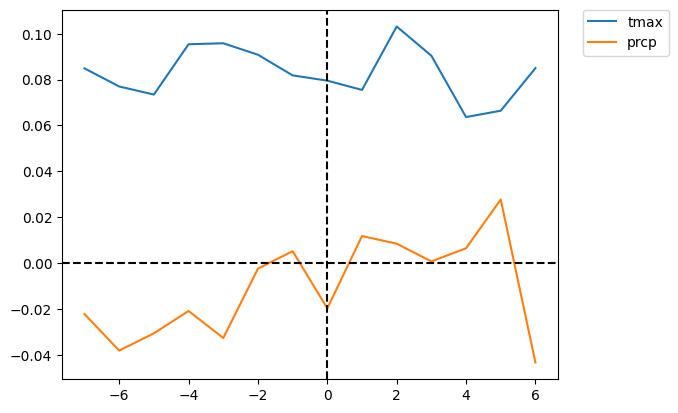

In [52]:
from functools import partial

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


def corr(a, b):
    return protests[a].corr(protests[b])


def plot_timeline(f, var):
    for col in weather_vars[2:4]:
        days, corrs = zip(
            *[(day, f(f"{col}_{day}", var)) for day in tqdm(range(-7, 7))]
        )
        plt.plot(days, corrs, label=col)
    plt.axvline(0, color="black", linestyle="--")
    if not isinstance(f, partial) and f.__name__ == "corr":
        plt.axhline(0, color="black", linestyle="--")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.show()


plot_timeline(corr, "size")

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

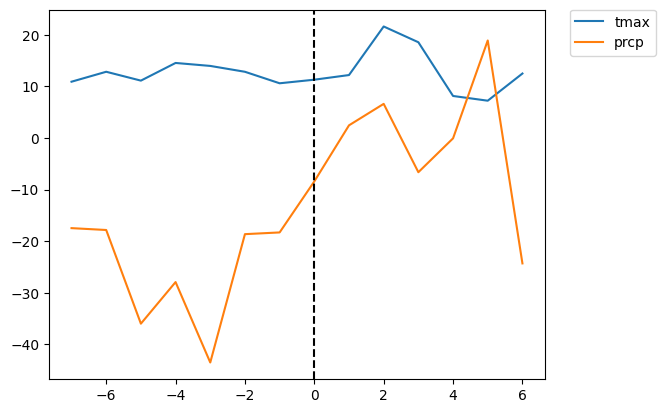

In [53]:
import statsmodels.api as sm

protests["avg_actor_size"] = protests.groupby("assoc_actor_1")["size"].transform("mean")
protests["avg_weekday_size"] = protests.groupby("weekday")["size"].transform("mean")
protests["avg_region_size"] = protests.groupby("admin1")["size"].transform("mean")
protests["avg_location_size"] = (
    protests.groupby("location")["size"].transform("mean") - protests["avg_region_size"]
)
protests["avg_actor_region_size"] = (
    protests.groupby(["assoc_actor_1", "admin1"])["size"].transform("mean")
    - protests["avg_region_size"]
)
protests["avg_actor_location_size"] = (
    protests.groupby(["assoc_actor_1", "location"])["size"].transform("mean")
    - protests["avg_location_size"]
)


def ols(a, b):
    df = protests[
        [
            a,
            b,
            "avg_actor_size",
            "avg_weekday_size",
            "avg_region_size",
            "avg_location_size",
            "avg_actor_region_size",
            "avg_actor_location_size",
        ]
    ]
    X, Y = df.drop(columns=[b]), df[b]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    return results.params[a]


plot_timeline(ols, "size")

In [54]:
protests["event_date"].min(), protests["event_date"].max()

(Timestamp('2020-01-03 00:00:00'), Timestamp('2022-12-22 00:00:00'))

1462 950


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

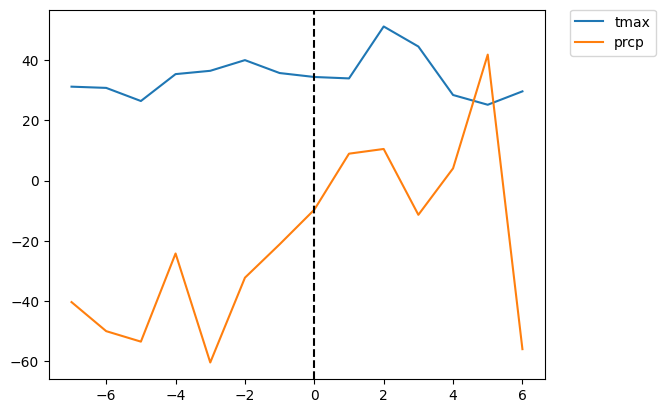

In [58]:
def get_latest_protest_sizes(location, date, actor):
    previous_protests = protests[
        (protests["location"] == location)
        & (protests["event_date"] < date)
        & (protests["assoc_actor_1"] == actor)
    ]["size"]
    if len(previous_protests) == 0:
        return -1
    return previous_protests.iloc[-5:].mean()


protests["latest_protest_size"] = protests.apply(
    lambda x: get_latest_protest_sizes(
        x["location"], x["event_date"], x["assoc_actor_1"]
    ),
    axis=1,
)
protests_ = protests[protests["latest_protest_size"] != -1]
print(len(protests), len(protests_))


def ols(a, b):
    df = protests_[[a, b, "latest_protest_size"]]
    X, Y = df.drop(columns=[b]), df[b]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    return results.params[a]


plot_timeline(ols, "size")

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

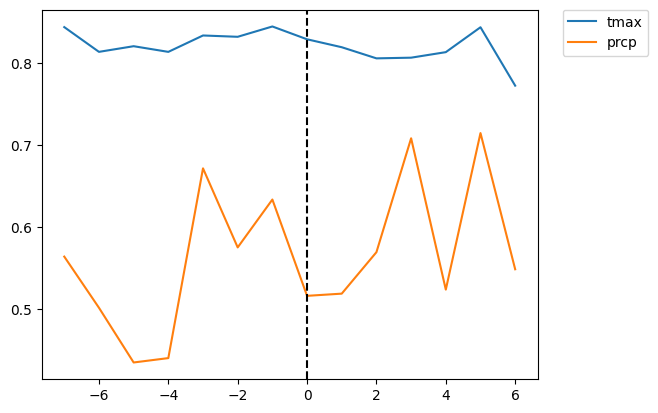

In [56]:
from functools import partial

from sklearn.ensemble import RandomForestRegressor


def rf(a, b, seed):
    df = protests[
        [
            a,
            b,
            "avg_actor_size",
            "avg_weekday_size",
            "avg_region_size",
            "avg_location_size",
            "avg_actor_region_size",
            "avg_actor_location_size",
        ]
    ]
    X, Y = df.drop(columns=[b]), df[b]
    model = RandomForestRegressor(random_state=seed)
    model.fit(X, Y)
    return model.score(X, Y)


def rf2(a, b, seed):
    df = protests[[a, b, "admin1", "location", "assoc_actor_1"]]
    dummy_vars = ["admin1", "location", "assoc_actor_1"]
    df = pd.concat(
        [df.drop(columns=dummy_vars), pd.get_dummies(df[dummy_vars])], axis=1
    )
    X, Y = df.drop(columns=[b]), df[b]
    model = RandomForestRegressor(random_state=seed)
    model.fit(X, Y)
    return model.score(X, Y)


plot_timeline(partial(rf2, seed=0), "size")

## Using protest occurrence as variable

In [ ]:
from protest_impact.data.weather import get_weather_history

location_dfs = []
for location in tqdm(protests.location.unique()):
    location_df = get_weather_history(location).query(
        "index >= '2020-01-01' and index <= '2022-12-31'"
    )
    location_protests = protests[protests.location == location]
    location_protests = location_protests.groupby("event_date").agg(
        {"assoc_actor_1": "count", "size": "sum"}
    )
    location_protests.columns = ["protest_count", "protest_size"]
    location_df = location_df.join(location_protests).fillna(0)
    location_dfs.append(location_df)
location_dfs[0][["protest_count"]].value_counts(), location_dfs[0][
    ["protest_size"]
].value_counts()

  0%|          | 0/40 [00:00<?, ?it/s]

(protest_count
 0.0              1074
 1.0                22
 dtype: int64,
 protest_size
 0.0             1074
 50.0               5
 100.0              3
 350.0              2
 10.0               1
 70.0               1
 120.0              1
 140.0              1
 150.0              1
 155.0              1
 200.0              1
 400.0              1
 450.0              1
 500.0              1
 1100.0             1
 1350.0             1
 dtype: int64)

In [ ]:
occurrence_df = pd.concat(location_dfs)
occurrence_df.shape

(43840, 12)

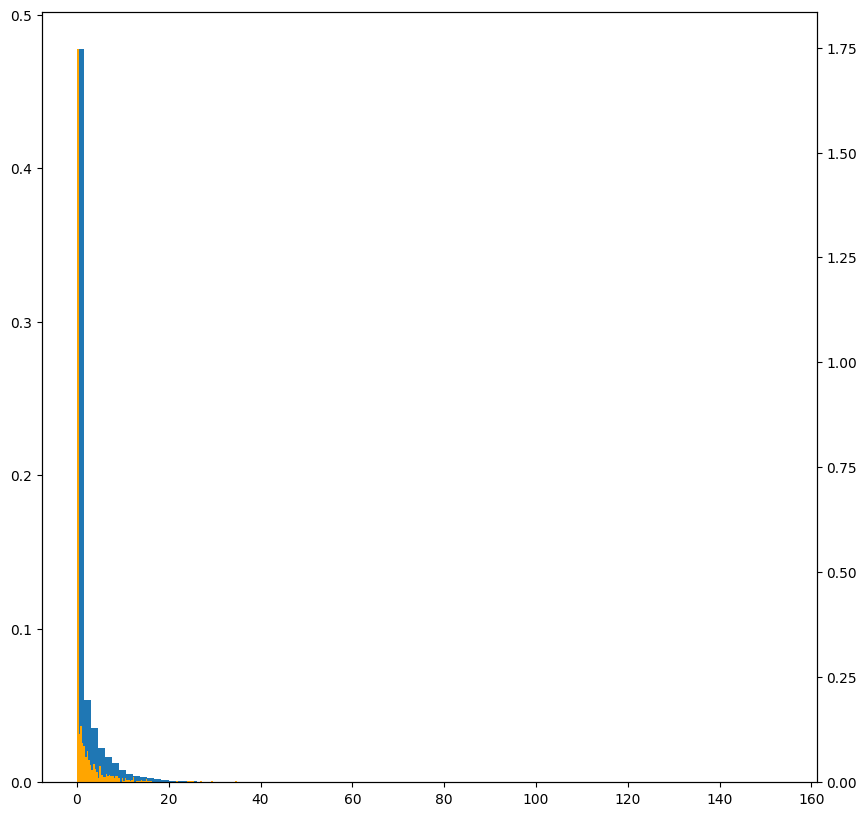

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(occurrence_df["prcp"], bins=100, density=True)
ax2 = ax.twinx()
ax2.hist(
    occurrence_df[occurrence_df["protest_count"] > 0]["prcp"],
    bins=100,
    density=True,
    color="orange",
)
plt.show()

Selecting a threshold:

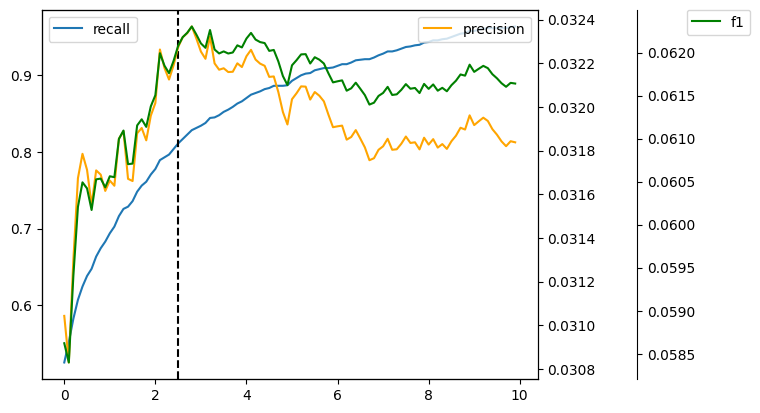

In [ ]:
metrics = []
for t in np.arange(0, 10, 0.1):
    matrix = np.array(
        [
            [
                occurrence_df.query(f"prcp > {t} & protest_count == 0").shape[0],
                occurrence_df.query(f"prcp > {t} & protest_count == 1").shape[0],
            ],
            [
                occurrence_df.query(f"prcp <= {t} & protest_count == 0").shape[0],
                occurrence_df.query(f"prcp <= {t} & protest_count == 1").shape[0],
            ],
        ]
    )
    recall = matrix[1, 1] / (matrix[1, 1] + matrix[0, 1])
    precision = matrix[1, 1] / (matrix[1, 1] + matrix[1, 0])
    f1 = 2 * (precision * recall) / (precision + recall)
    metrics.append(dict(t=t, matrix=matrix, recall=recall, precision=precision, f1=f1))
metrics = pd.DataFrame(metrics)

fig, ax = plt.subplots()
ax.plot(metrics.t, metrics.recall, label="recall")
ax2 = ax.twinx()
ax2.plot(metrics.t, metrics.precision, label="precision", color="orange")
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.plot(metrics.t, metrics.f1, label="f1", color="green")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
# position outside the axes
ax3.legend(bbox_to_anchor=(1.3, 1), loc="upper left", borderaxespad=0.0)
ax.axvline(2.5, color="black", linestyle="--")
plt.show()

prcp = 2.5 is indeed a good threshold.

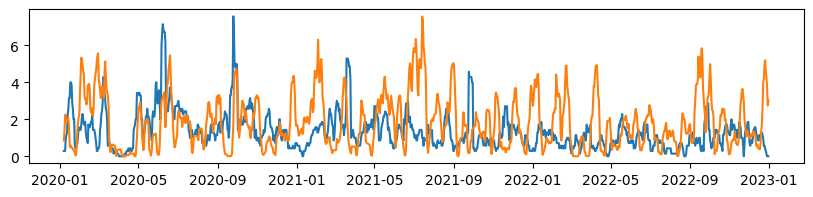

In [ ]:
by_date = occurrence_df.groupby("time").agg(
    {"protest_count": "sum", "protest_size": "sum", "prcp": "mean"}
)
plt.plot(by_date.index, by_date.protest_count.rolling(7).mean(), label="protest count")
plt.plot(by_date.index, by_date.prcp.rolling(7).mean(), label="protest count")
plt.gcf().set_size_inches(10, 2)

In [ ]:
location_df = get_weather_history("Berlin").query(
    "index >= '2019-01-01' and index <= '2023-06-01'"
)
location_df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2019-01-01,6.6,4.6,7.8,2.2,0.0,271.0,31.0,63.0,1017.7,42.0
2019-01-02,2.1,-1.7,4.5,0.0,0.0,318.0,23.1,57.4,1023.4,108.0
2019-01-03,-0.6,-2.4,1.8,0.0,0.0,314.0,12.3,27.8,1032.5,0.0
2019-01-04,1.4,-1.5,4.9,0.8,0.0,275.0,14.7,33.3,1028.1,0.0
2019-01-05,6.1,4.4,7.5,0.8,0.0,322.0,14.8,31.5,1020.3,24.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,4.4,2.7,6.5,0.0,0.0,253.0,18.6,46.3,1020.8,60.0
2022-12-28,5.4,2.8,7.6,1.5,0.0,207.0,19.1,40.8,1014.3,82.8
2022-12-29,9.4,7.6,11.5,1.8,0.0,215.0,20.5,44.5,1005.8,79.2


In [ ]:
location_df.shift(-1).fillna(method="ffill").fillna(method="bfill")

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2019-01-01,2.1,-1.7,4.5,0.0,0.0,318.0,23.1,57.4,1023.4,108.0
2019-01-02,-0.6,-2.4,1.8,0.0,0.0,314.0,12.3,27.8,1032.5,0.0
2019-01-03,1.4,-1.5,4.9,0.8,0.0,275.0,14.7,33.3,1028.1,0.0
2019-01-04,6.1,4.4,7.5,0.8,0.0,322.0,14.8,31.5,1020.3,24.0
2019-01-05,2.3,1.4,4.0,0.0,0.0,313.0,7.2,20.4,1028.2,12.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,5.4,2.8,7.6,1.5,0.0,207.0,19.1,40.8,1014.3,82.8
2022-12-28,9.4,7.6,11.5,1.8,0.0,215.0,20.5,44.5,1005.8,79.2
2022-12-29,7.3,6.1,8.9,2.0,0.0,206.0,18.7,42.6,1011.1,37.2


In [ ]:
from protest_impact.data.weather import get_weather_history

corrs = []
for day in tqdm(range(-60, 60)):
    location_dfs = []
    for location in protests.location.unique():
        location_df = get_weather_history(location).query(
            "index >= '2019-01-01' and index <= '2023-06-01'"
        )
        location_df = location_df.shift(-day)
        location_protests = protests[protests.location == location]
        location_protests = location_protests.groupby("event_date").agg(
            {"assoc_actor_1": "count", "size": "sum"}
        )
        location_protests.columns = ["protest_count", "protest_size"]
        location_df = location_df.join(location_protests).fillna(0)
        location_df = location_df.query(
            "index >= '2020-01-01' and index <= '2022-12-31'"
        )
        location_dfs.append(location_df)
    occurrence_df = pd.concat(location_dfs)
    good_weather = occurrence_df["prcp"] <= 2.5
    protest_occurrence = occurrence_df["protest_count"] > 0
    tp, fp, tn, fn = (
        np.sum(good_weather & protest_occurrence),
        np.sum(good_weather & ~protest_occurrence),
        np.sum(~good_weather & ~protest_occurrence),
        np.sum(~good_weather & protest_occurrence),
    )
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2 * (precision * recall) / (precision + recall)
    corrs.append(
        dict(
            day=day,
            corr=np.corrcoef(good_weather, protest_occurrence)[0, 1],
            recall=recall,
            precision=precision,
            f1=f1,
            good_weather=sum(good_weather[protest_occurrence]),
            prcp=sum(occurrence_df["prcp"][protest_occurrence]),
            tavg=sum(occurrence_df["tavg"][protest_occurrence]),
            wspd=sum(occurrence_df["wspd"][protest_occurrence]),
            tsun=sum(occurrence_df["tsun"][protest_occurrence]),
        )
    )
corrs = pd.DataFrame(corrs)

  0%|          | 0/120 [00:00<?, ?it/s]

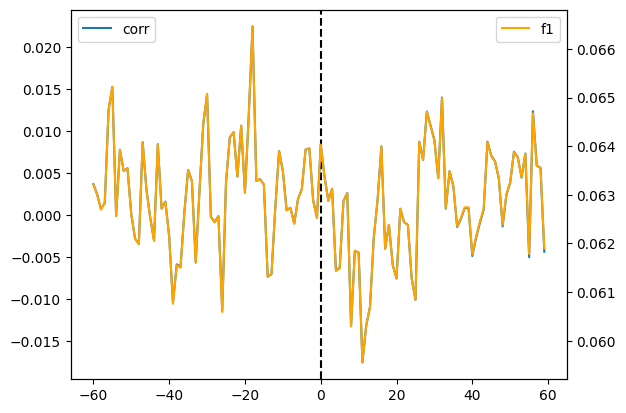

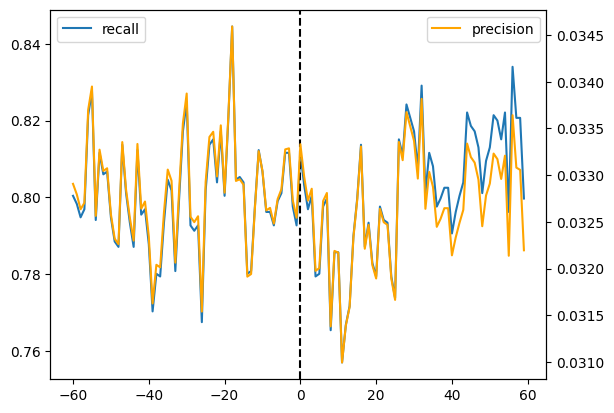

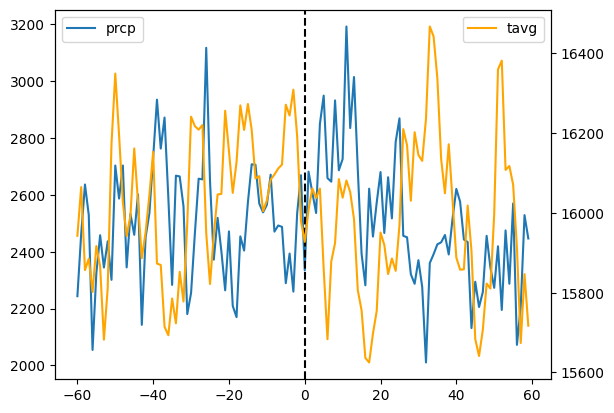

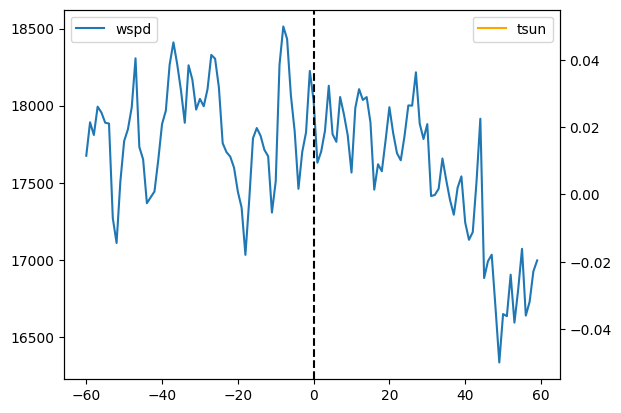

In [ ]:
def plot_props(df, p1, p2):
    fig, ax = plt.subplots()
    ax.plot(df.day, df[p1], label=p1)
    ax2 = ax.twinx()
    ax2.plot(df.day, df[p2], label=p2, color="orange")
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")
    ax.axvline(0, color="black", linestyle="--")
    plt.show()


plot_props(corrs, "corr", "f1")
plot_props(corrs, "recall", "precision")
plot_props(corrs, "prcp", "tavg")
plot_props(corrs, "wspd", "tsun")

## Climate protests

In [ ]:
from protest_impact.data.protests import (
    aggregate_protests,
    get_climate_protests,
    get_climate_queries,
)
from protest_impact.synthetic_region import get_regional_count_df

protests = get_climate_protests(groups=["fff", "alg", "xr"])
protests = aggregate_protests(protests)
protests = protests.query("size > 0")
queries = get_climate_queries()

In [ ]:
import pandas as pd


def get_discourse_change(row):
    ts = get_regional_count_df(
        region=row["admin1"],
        query_string=queries["climate_and_protest"][0],
        source="mediacloud",
    )
    pre_week = ts[ts["date"] < row["event_date"]]["count"].iloc[-7:]
    post_week = ts[ts["date"] >= row["event_date"]]["count"].iloc[:7]
    event_day = ts[ts["date"] == row["event_date"]]["count"].iloc[0]
    if pre_week.mean() == 0:
        return np.nan
    return event_day - pre_week.mean()


changes = protests.apply(get_discourse_change, axis=1)
changes.name = "discourse_change"
protests = pd.concat([protests, changes], axis=1)
print(len(protests))
protests = protests[~protests["discourse_change"].isna()]
print(len(protests))

312
309


In [ ]:
from protest_impact.data.weather import get_weather

weather = protests.apply(lambda x: get_weather(x["location"], x["event_date"]), axis=1)
weather.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,7.4,2.3,11.2,0.9,0.0,246.0,13.7,41.8,1022.3,334.0
1,3.1,-0.6,7.2,0.0,0.0,164.0,5.8,16.6,1024.1,176.0
2,6.6,-0.9,12.0,0.0,0.0,114.0,10.1,20.5,1029.0,245.0
3,2.4,-0.8,5.3,0.5,0.0,214.0,10.4,41.0,1026.3,80.0
4,-0.1,-6.9,9.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# impute NaNs using random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0, estimator=RandomForestRegressor())
imp.fit(weather)
weather = pd.DataFrame(
    imp.transform(weather), columns=weather.columns, index=weather.index
)
weather.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,7.4,2.3,11.2,0.9,0.0,246.00,13.700,41.800,1022.300,334.00
1,3.1,-0.6,7.2,0.0,0.0,164.00,5.800,16.600,1024.100,176.00
2,6.6,-0.9,12.0,0.0,0.0,114.00,10.100,20.500,1029.000,245.00
3,2.4,-0.8,5.3,0.5,0.0,214.00,10.400,41.000,1026.300,80.00
4,-0.1,-6.9,9.5,0.0,0.0,218.19,10.601,34.251,1024.999,243.41


In [ ]:
import numpy as np

endog = np.log10(protests["size"])
exog = protests[["admin1", "assoc_actor_1", "weekday"]]
exog = pd.get_dummies(exog, columns=["admin1", "assoc_actor_1", "weekday"])
instr = weather
dep = protests["discourse_change"]

In [ ]:
# interaction terms between size and assoc_actor_1
# endog = pd.get_dummies(protests["assoc_actor_1"]).multiply(endog, axis="index")

<Axes: >

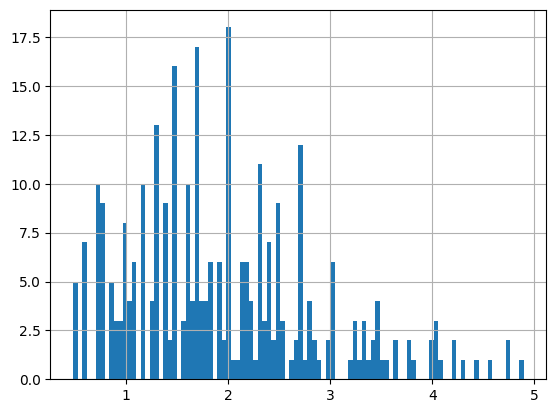

In [ ]:
endog.hist(bins=100)

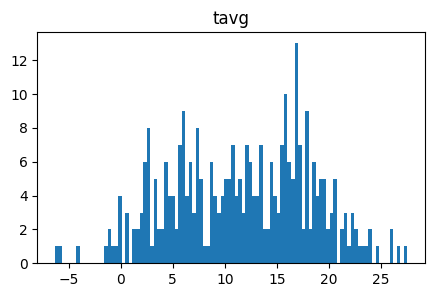

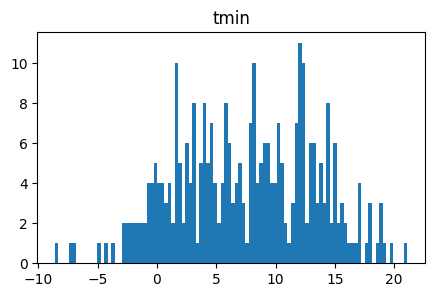

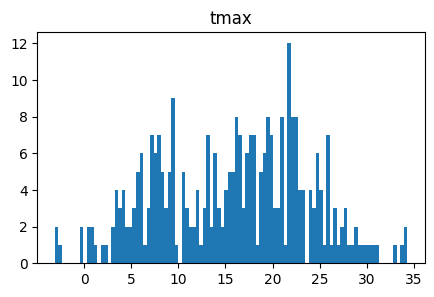

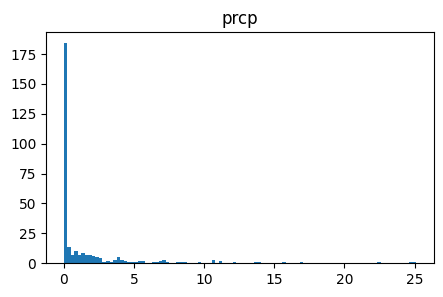

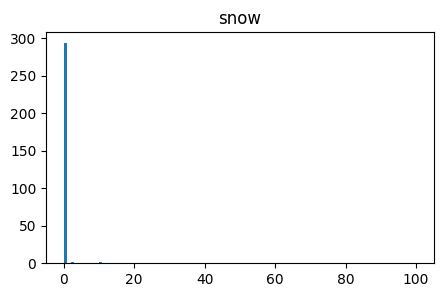

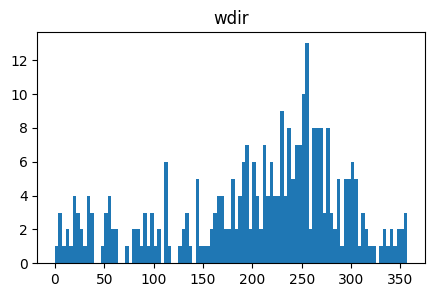

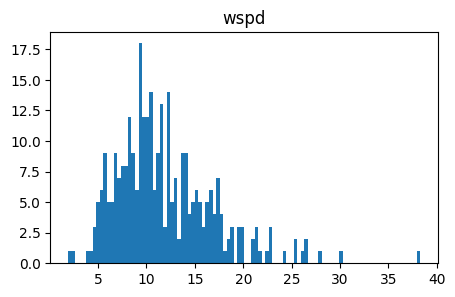

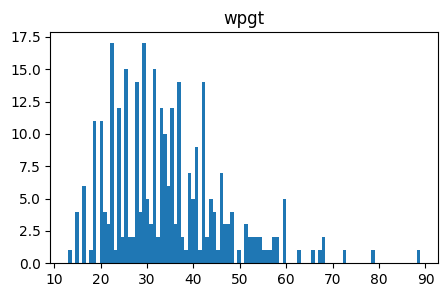

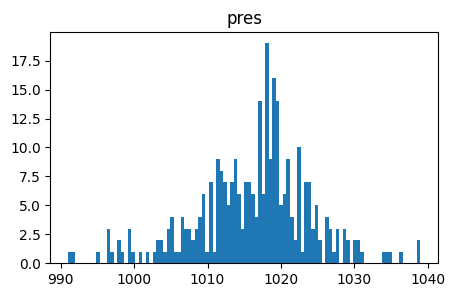

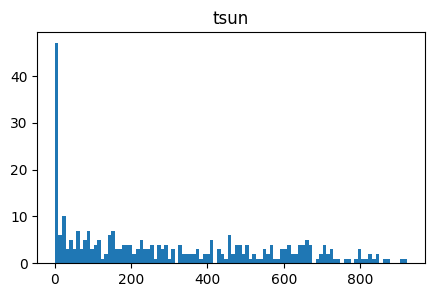

In [ ]:
# plot distribution of each variable
import matplotlib.pyplot as plt

for col in instr.columns:
    plt.hist(instr[col], bins=100)
    plt.title(col)
    plt.gcf().set_size_inches(5, 3)
    plt.show()

In [ ]:
# regress size on weather

import statsmodels.api as sm

X = instr
y = endog
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.415
Date:                Mon, 15 May 2023   Prob (F-statistic):              0.173
Time:                        19:13:14   Log-Likelihood:                -406.48
No. Observations:                 309   AIC:                             835.0
Df Residuals:                     298   BIC:                             876.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0390      7.870      0.386      0.7

In [ ]:
# regress discourse change on weather
import statsmodels.api as sm

X = instr
y = dep
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       discourse_change   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.282
Date:                Mon, 15 May 2023   Prob (F-statistic):              0.240
Time:                        19:13:14   Log-Likelihood:                -1350.0
No. Observations:                 309   AIC:                             2722.
Df Residuals:                     298   BIC:                             2763.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.5265    166.751      1.592      0.1

### 2SLS without exog

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.415
Date:                Mon, 15 May 2023   Prob (F-statistic):              0.173
Time:                        19:13:14   Log-Likelihood:                -406.48
No. Observations:                 309   AIC:                             835.0
Df Residuals:                     298   BIC:                             876.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0390      7.870      0.386      0.7

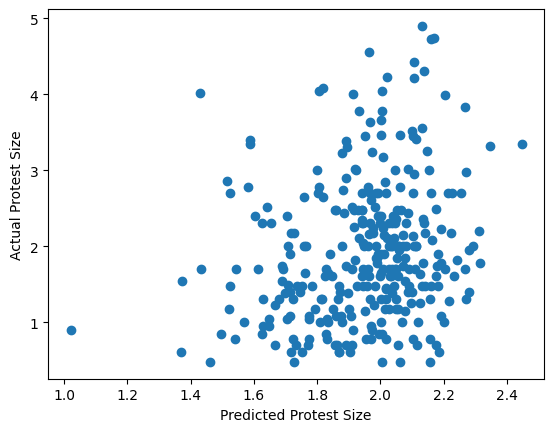

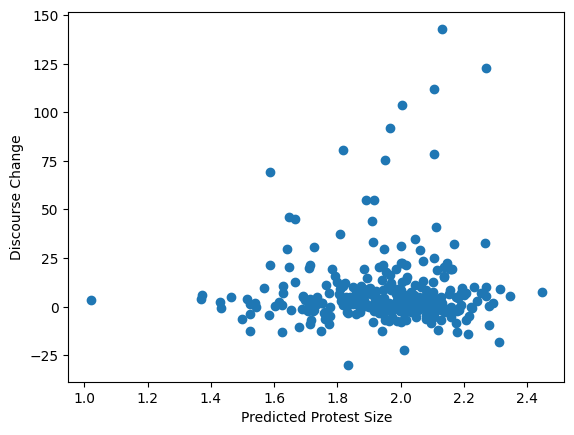

                            OLS Regression Results                            
Dep. Variable:       discourse_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6301
Date:                Mon, 15 May 2023   Prob (F-statistic):              0.428
Time:                        19:13:15   Log-Likelihood:                -1356.2
No. Observations:                 309   AIC:                             2716.
Df Residuals:                     307   BIC:                             2724.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1442     11.088     -0.

In [ ]:
# use 2SLS to estimate the causal effect of protest size on discourse change

# 1st stage: regress protest size on weather
X = instr
y = endog
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
endog_pred = results.predict(X)
endog_pred.name = "size_predicted"

# plot predicted protest size against actual protest size
import matplotlib.pyplot as plt

plt.scatter(endog_pred, y)
plt.xlabel("Predicted Protest Size")
plt.ylabel("Actual Protest Size")
plt.show()

# plot predicted protest size against discourse change
plt.scatter(endog_pred, dep)
plt.xlabel("Predicted Protest Size")
plt.ylabel("Discourse Change")
plt.show()

# 2nd stage: regress discourse change on predicted protest size
X = endog_pred
y = dep
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

### 2SLS with exog

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     8.540
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.07e-23
Time:                        19:13:15   Log-Likelihood:                -321.08
No. Observations:                 309   AIC:                             698.2
Df Residuals:                     281   BIC:                             802.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

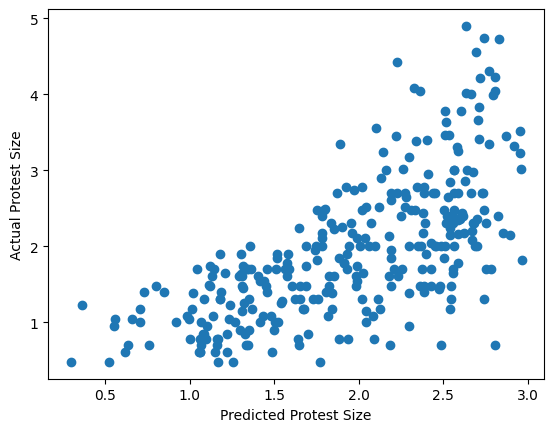

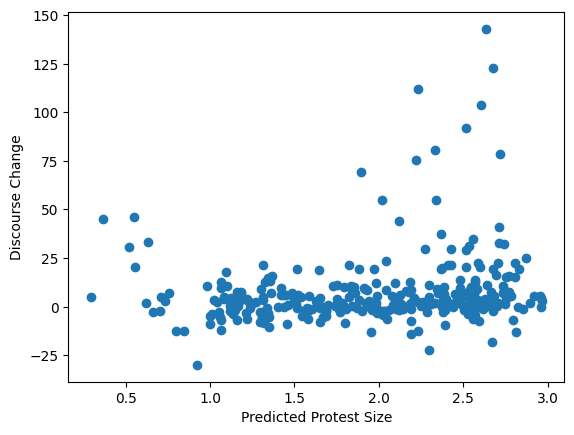

                            OLS Regression Results                            
Dep. Variable:       discourse_change   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2.924
Date:                Mon, 15 May 2023   Prob (F-statistic):           8.43e-05
Time:                        19:13:15   Log-Likelihood:                -1330.7
No. Observations:                 309   AIC:                             2699.
Df Residuals:                     290   BIC:                             2770.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [ ]:
# use 2SLS to estimate the causal effect of protest size on discourse change

# 1st stage: regress protest size on weather
X = pd.concat([instr, exog], axis=1)
y = endog
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
endog_pred = results.predict(X)
endog_pred.name = "size_predicted"

# plot predicted protest size against actual protest size
import matplotlib.pyplot as plt

plt.scatter(endog_pred, y)
plt.xlabel("Predicted Protest Size")
plt.ylabel("Actual Protest Size")
plt.show()

# plot predicted protest size against discourse change
plt.scatter(endog_pred, dep)
plt.xlabel("Predicted Protest Size")
plt.ylabel("Discourse Change")
plt.show()

# 2nd stage: regress discourse change on predicted protest size
X = pd.concat([endog_pred, exog], axis=1)
y = dep
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

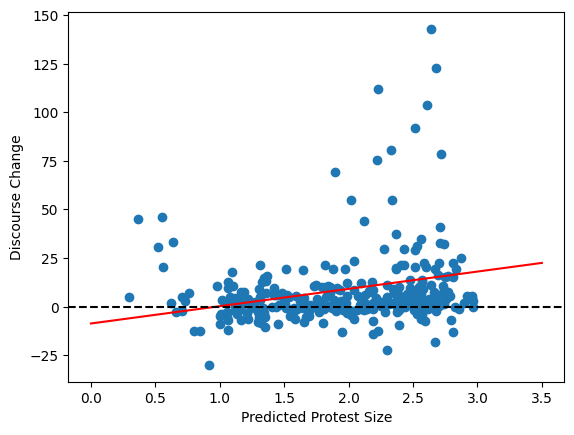

In [ ]:
# plot predicted size against discourse change
plt.scatter(endog_pred, dep)
# plot regression line
intercept = results.params["const"]
slope = results.params["size_predicted"]
x = np.linspace(0, 3.5, 100)
y = intercept + slope * x
plt.plot(x, y, color="red")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Predicted Protest Size")
plt.ylabel("Discourse Change")
plt.show()

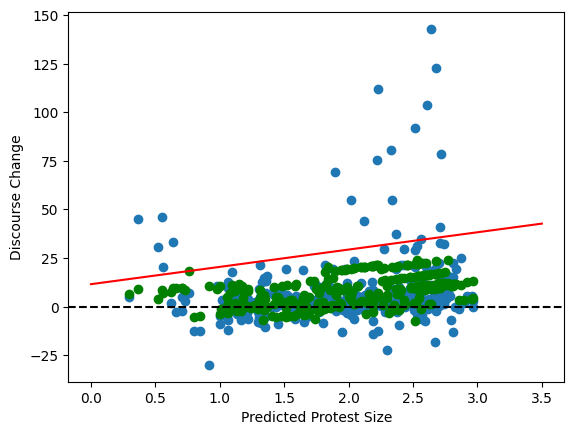

In [ ]:
exog = protests[["admin1", "assoc_actor_1", "weekday"]]
exog = pd.get_dummies(
    exog, columns=["admin1", "assoc_actor_1", "weekday"], drop_first=True
)
# 1st stage: regress protest size on weather
X = pd.concat([instr, exog], axis=1)
y = endog
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
endog_pred = results.predict(X)
endog_pred.name = "size_predicted"
# 2nd stage: regress discourse change on predicted protest size
X = pd.concat([endog_pred, exog], axis=1)
y = dep
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
# plot predicted size against discourse change
plt.scatter(endog_pred, dep)
# plot predicted size against predicted discourse change (?)
plt.scatter(endog_pred, results.predict(), color="green")
# plot regression line
intercept = results.params["const"]
slope = results.params["size_predicted"]
x = np.linspace(0, 3.5, 100)
y = intercept + slope * x
plt.plot(x, y, color="red")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Predicted Protest Size")
plt.ylabel("Discourse Change")
plt.show()

👀

## liblinear 2SLS

In [ ]:
from linearmodels.iv.model import IV2SLS

iv = IV2SLS(dependent=dep, exog=np.ones(len(dep)), endog=endog, instruments=instr)
results = iv.fit()
print(results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       discourse_change   R-squared:                      0.1330
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1302
No. Observations:                 309   F-statistic:                    0.7214
Date:                Mon, May 15 2023   P-value (F-stat)                0.3957
Time:                        19:13:15   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
exog          -1.1442     10.026    -0.1141     0.9091     -20.794      18.506
size           4.4945     5.2918     0.8493     0.39

In [ ]:
exog["const"] = 1
iv = IV2SLS(dependent=dep, exog=exog, endog=endog, instruments=instr)
results = iv.fit()
print(results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       discourse_change   R-squared:                      0.3086
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2657
No. Observations:                 309   F-statistic:                    60.902
Date:                Mon, May 15 2023   P-value (F-stat)                0.0000
Time:                        19:13:16   Distribution:                 chi2(18)
Cov. Estimator:                robust                                         
                                                                              
                                                     Parameter Estimates                                                     
                                                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------------------------------

In [ ]:
results

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:       discourse_change   R-squared:                      0.3086
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2657
No. Observations:                 309   F-statistic:                    60.902
Date:                Mon, May 15 2023   P-value (F-stat)                0.0000
Time:                        19:13:16   Distribution:                 chi2(18)
Cov. Estimator:                robust                                         
                                                                              
                                                     Parameter Estimates                                                     
=============================================================================================================================
                                                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------------------------------
admin1_Berlin                                                -13.977     6.8444    -2.0421     0.0411     -27.392     -0.5620
admin1_Hamburg                                               -14.924     7.2826    -2.0493     0.0404     -29.198     -0.6506
admin1_Hessen                                                -16.008     6.7985    -2.3546     0.0185     -29.333     -2.6832
admin1_Niedersachsen                                         -2.0950     6.1309    -0.3417     0.7326     -14.111      9.9213
admin1_Nordrhein-Westfalen                                   -8.3580     5.4113    -1.5445     0.1225     -18.964      2.2481
admin1_Rheinland-Pfalz                                       -23.696     8.6804    -2.7299     0.0063     -40.710     -6.6832
admin1_Saarland                                              -17.577     4.9569    -3.5460     0.0004     -27.293     -7.8618
admin1_Sachsen                                               -14.140     6.1871    -2.2854     0.0223     -26.267     -2.0136
admin1_Schleswig-Holstein                                    -13.580     6.1842    -2.1959     0.0281     -25.700     -1.4589
assoc_actor_1_Extinction Rebellion                           -5.2797     5.6843    -0.9288     0.3530     -16.421      5.8613
assoc_actor_1_FFF: Fridays for Future; Students (Germany)    -10.042     11.620    -0.8642     0.3875     -32.817      12.733
weekday_Monday                                               -7.8618     3.0655    -2.5646     0.0103     -13.870     -1.8535
weekday_Saturday                                             -10.128     4.2960    -2.3576     0.0184     -18.548     -1.7083
weekday_Sunday                                               -12.335     6.1054    -2.0203     0.0434     -24.301     -0.3683
weekday_Thursday                                             -5.8785     3.7327    -1.5748     0.1153     -13.194      1.4375
weekday_Tuesday                                              -9.3755     3.2217    -2.9101     0.0036     -15.690     -3.0612
weekday_Wednesday                                            -8.1698     3.0482    -2.6802     0.0074     -14.144     -2.1954
const                                                         11.539     8.2208     1.4037     0.1604     -4.5732      27.652
size                                                          8.9022     9.4037     0.9467     0.3438     -9.5286      27.333
=============================================================================================================================

Endogenous: size
Instruments: tavg, tmin, tmax, prcp, snow, wdir, wspd, wpgt, pres, tsun
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x30dc1dc30

In [ ]:
results.has_constant

True

## Covid

In [ ]:
covid_df = pd.read_csv(project_root / "datasets" / "covid" / "owid-covid-data.csv")
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
covid_cols = [
    "new_deaths_smoothed_per_million",
    "icu_patients_per_million",
    "new_tests_smoothed_per_thousand",
    "stringency_index",
]
covid_df = covid_df.query("location == 'Germany'").sort_values("date")[
    ["date"] + covid_cols
]
covid_df["date"] = pd.to_datetime(covid_df["date"])
covid_df.set_index("date", inplace=True)
covid_df.tail()

,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests_smoothed_per_thousand,stringency_index
date,,,,
2023-05-10,NaN,4.402,NaN,NaN
2023-05-11,NaN,4.138,NaN,NaN
2023-05-12,NaN,4.066,NaN,NaN
2023-05-13,NaN,4.042,NaN,NaN
2023-05-14,NaN,4.054,NaN,NaN


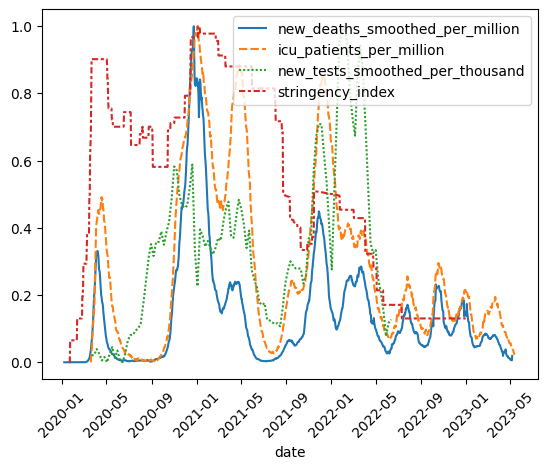

In [ ]:
import seaborn as sns

# min-max normalize all columns
for col in covid_cols:
    covid_df[col] = (covid_df[col] - covid_df[col].min()) / (
        covid_df[col].max() - covid_df[col].min()
    )

# plot all time series in one plot
sns.lineplot(data=covid_df[covid_cols])
# rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

In [ ]:
for col in covid_cols:
    print(col, covid_df[col].isna().sum())
    covid_df[col] = covid_df[col].fillna(0)

new_deaths_smoothed_per_million 13
icu_patients_per_million 77
new_tests_smoothed_per_thousand 415
stringency_index 153


In [ ]:
protests = protests.join(covid_df, on=["event_date"], how="left")
print(protests.shape)
protests = protests.dropna(subset=covid_cols)
print(protests.shape)
protests.head()

ValueError: columns overlap but no suffix specified: Index(['new_deaths_smoothed_per_million', 'icu_patients_per_million',
       'new_tests_smoothed_per_thousand', 'stringency_index'],
      dtype='object')

In [ ]:
endog = protests["size"]
exog = protests[["admin1", "assoc_actor_1", "weekday"]]
exog = pd.get_dummies(
    exog, columns=["admin1", "assoc_actor_1", "weekday"], drop_first=True
)
exog["const"] = 1
instr = protests[covid_cols]
dep = protests["discourse_change"]

In [ ]:
endog.isna().sum(), exog.isna().sum(), instr.isna().sum(), dep.isna().sum()

(0,
 admin1_Berlin                                                0
 admin1_Hamburg                                               0
 admin1_Hessen                                                0
 admin1_Niedersachsen                                         0
 admin1_Nordrhein-Westfalen                                   0
 admin1_Rheinland-Pfalz                                       0
 admin1_Saarland                                              0
 admin1_Sachsen                                               0
 admin1_Schleswig-Holstein                                    0
 assoc_actor_1_Extinction Rebellion                           0
 assoc_actor_1_FFF: Fridays for Future; Students (Germany)    0
 weekday_Monday                                               0
 weekday_Saturday                                             0
 weekday_Sunday                                               0
 weekday_Thursday                                             0
 weekday_Tuesday                    

In [ ]:
iv = IV2SLS(dependent=dep, exog=np.ones(len(exog)), endog=endog, instruments=instr)
results = iv.fit()
print(results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       discourse_change   R-squared:                      0.0164
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0132
No. Observations:                 308   F-statistic:                    7.0843
Date:                Tue, May 16 2023   P-value (F-stat)                0.0078
Time:                        11:21:02   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
exog           3.6646     1.2083     3.0329     0.0024      1.2964      6.0328
size           0.0026     0.0010     2.6616     0.00

Inputs contain missing values. Dropping rows with missing observations.


In [ ]:
iv = IV2SLS(dependent=dep, exog=exog, endog=endog, instruments=instr)
results = iv.fit()
print(results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       discourse_change   R-squared:                      0.1118
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0565
No. Observations:                 308   F-statistic:                    70.661
Date:                Tue, May 16 2023   P-value (F-stat)                0.0000
Time:                        11:21:02   Distribution:                 chi2(18)
Cov. Estimator:                robust                                         
                                                                              
                                                     Parameter Estimates                                                     
                                                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------------------------------

Inputs contain missing values. Dropping rows with missing observations.


In [ ]:
_endog = (
    pd.get_dummies(protests["assoc_actor_1"])
    .multiply(endog, axis="index")
    .rename(lambda x: "size_" + x, axis="columns")
)

In [ ]:
iv = IV2SLS(dependent=dep, exog=exog, endog=_endog, instruments=instr)
results = iv.fit()
print(results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       discourse_change   R-squared:                     -3.9683
Estimator:                    IV-2SLS   Adj. R-squared:                -4.3145
No. Observations:                 308   F-statistic:                    30.854
Date:                Tue, May 16 2023   P-value (F-stat)                0.0571
Time:                        11:21:04   Distribution:                 chi2(20)
Cov. Estimator:                robust                                         
                                                                              
                                                     Parameter Estimates                                                     
                                                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------------------------------

Inputs contain missing values. Dropping rows with missing observations.


In [ ]:
results.wooldridge_overid

Wooldridge's score test of overidentification
H0: Model is not overidentified.
Statistic: 0.5484
P-value: 0.4590
Distributed: chi2(1)
WaldTestStatistic, id: 0x2f41cee00

In [ ]:
results.wooldridge_regression

Wooldridge's regression test of exogeneity
H0: Endogenous variables are exogenous
Statistic: 4.0938
P-value: 0.2515
Distributed: chi2(3)
WaldTestStatistic, id: 0x2f41cf2e0

In [ ]:
results.wooldridge_score

Wooldridge's score test of exogeneity
H0: Endogenous variables are exogenous
Statistic: 3.7677
P-value: 0.2877
Distributed: chi2(3)
WaldTestStatistic, id: 0x2f41cffa0

In [ ]:
from linearmodels.iv.model import IVLIML

iv = IVLIML(dependent=dep, exog=exog, endog=endog, instruments=instr)
results = iv.fit()
print(results.summary)

                          IV-LIML Estimation Summary                          
Dep. Variable:       discourse_change   R-squared:                     -0.2209
Estimator:                    IV-LIML   Adj. R-squared:                -0.2970
No. Observations:                 308   F-statistic:                    66.233
Date:                Tue, May 16 2023   P-value (F-stat)                0.0000
Time:                        11:21:15   Distribution:                 chi2(18)
Cov. Estimator:                robust                                         
                                                                              
                                                     Parameter Estimates                                                     
                                                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------------------------------

Inputs contain missing values. Dropping rows with missing observations.


In [ ]:
from linearmodels.iv.model import IVGMM

iv = IVGMM(dependent=dep, exog=exog, endog=endog, instruments=instr)
results = iv.fit()
print(results.summary)

                          IV-GMM Estimation Summary                           
Dep. Variable:       discourse_change   R-squared:                      0.0825
Estimator:                     IV-GMM   Adj. R-squared:                 0.0253
No. Observations:                 308   F-statistic:                    68.269
Date:                Tue, May 16 2023   P-value (F-stat)                0.0000
Time:                        13:36:22   Distribution:                 chi2(18)
Cov. Estimator:                robust                                         
                                                                              
                                                     Parameter Estimates                                                     
                                                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------------------------------

Inputs contain missing values. Dropping rows with missing observations.
